# What is linear regrssion?
- Linear regression is a supervised machine learning algorithm, which calculates a best fit line for the input data.
- Used to predict continuous data by modeling the data.

# Mathematical Equation
y = m*x + b

where, <br>
b = $\overline{y} - m*\overline{x} $ <br><br>
m = $\frac {\sum_{i=1}^{n} (y_i - \overline{y}) * ({x_i} - \overline{x})} {\sum_{i=1}^{n}({x_i} - \overline{x})^2}$

(50, 1) (50,)


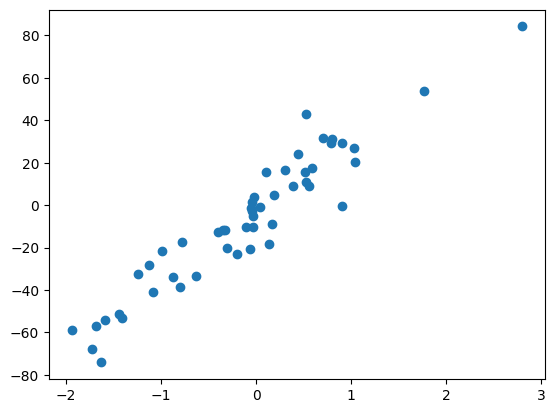

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

input, output = make_regression(n_samples=50, n_features=1, noise=10)
print(f"{input.shape} {output.shape}")
train_df = pd.DataFrame({
    'feature_1': input[:, 0],
    'label': output
})
plt.tight_layout()
plt.scatter(train_df['feature_1'], train_df['label'])
plt.show()

In [5]:
train_df.columns

Index(['feature_1', 'label'], dtype='object')

# Linear Regression from Scratch

In [40]:
class manual_lr:
    """
    get_slope_intercept: Returns m and b of the lines.
    m: slope of the line
    b: intercept of the line
    """

    def __init__(self) -> None:
        self.m = None 
        self.b = None  

    def get_slope_intercept(self, input_df: pd.DataFrame):
        """
        input_df: consists of a single continuous independent variable and one dependent variable
        """ 
        
        num = 0
        denom = 0

        for _, row in input_df.iterrows():
            # print(f"{index} {row[[0]]} ") 
            num = num + ( (row[1] - np.mean(input_df.values[:, 1])) * (row[0] - np.mean(input_df.values[:, 0])) )
            denom = denom + np.square( row[0] - np.mean(input_df.iloc[:, 0]) )

        self.m = num / denom
        self.b = np.mean(input_df.iloc[:, 1]) - ( self.m*np.mean(input_df.iloc[:, 0]) )

        return self.m, self.b 

In [41]:
mlr = manual_lr()
slope, intercept = mlr.get_slope_intercept(input_df=train_df)

print(slope, intercept)

32.575654915872384 -3.204922004793008


C:\Users\rohit\AppData\Local\Temp\ipykernel_9848\1933494812.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num = num + ( (row[1] - np.mean(input_df.values[:, 1])) * (row[0] - np.mean(input_df.values[:, 0])) )
C:\Users\rohit\AppData\Local\Temp\ipykernel_9848\1933494812.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  denom = denom + np.square( row[0] - np.mean(input_df.iloc[:, 0]) )


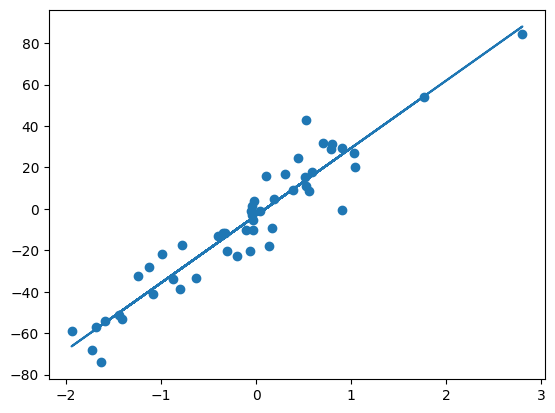

In [43]:
plt.tight_layout()
plt.scatter(train_df['feature_1'], train_df['label'])
plt.plot(train_df['feature_1'], (slope*train_df['feature_1'] + intercept) )
plt.show()

# Implement linear regression using SKLearn

In [57]:
print(lr.coef_[0,0], lr.intercept_[0])


32.5756549158724 -3.2049220047930063


[[32.57565492]] [-3.204922]


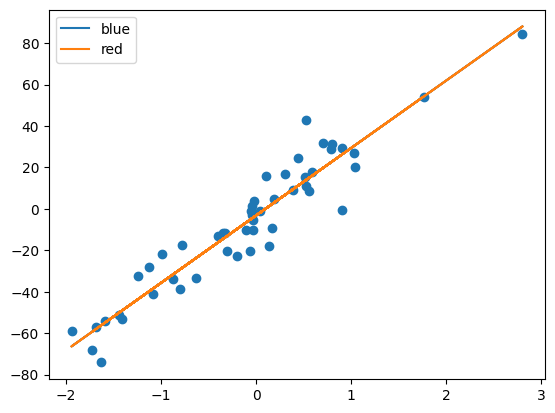

In [60]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_df.values[:, 0].reshape(-1,1), train_df.values[:, 1].reshape(-1,1))
print(lr.coef_, lr.intercept_)

plt.tight_layout()
plt.scatter(train_df['feature_1'], train_df['label'])
plt.plot(train_df['feature_1'], (slope*train_df['feature_1'] + intercept), label='blue' )
plt.plot(train_df['feature_1'], (lr.coef_[0,0]*train_df['feature_1'] + lr.intercept_[0]), label='red' )
plt.legend()
plt.show()

# Polynomial Regression

(300, 1) (300,)


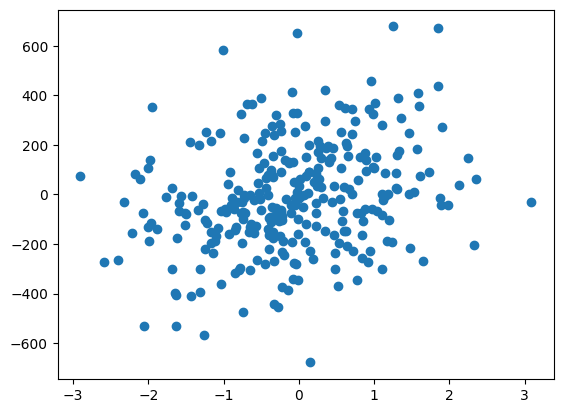

,feature_1,feature_1^2,label
20,-1.624598,2.639317,-405.941176
18,-0.629559,0.396345,-131.427999
147,0.628268,0.394721,-146.533553
11,-0.211932,0.044915,-189.093769
99,0.532281,0.283323,359.720064


In [140]:
from sklearn.preprocessing import PolynomialFeatures
input, output = make_regression(n_samples=300, n_features=1, noise=200)
print(f"{input.shape} {output.shape}")
poly_train_df = pd.DataFrame({
    'feature_1': input[:, 0],
    'label': output
})
plt.tight_layout()
plt.scatter(poly_train_df['feature_1'], poly_train_df['label'])
plt.show()


poly_obj = PolynomialFeatures(degree=2)
# train_df_trns = poly_obj.fit_transform(X=poly_train_df.values[:, 0].reshape(-1, 1))
poly_col = np.square(poly_train_df.values[:, 0]).reshape(-1,1)
# print(train_df_trns.shape)
# train_df_trns
# poly_col
poly_trns_df = pd.DataFrame({
    'feature_1': poly_train_df['feature_1'],
    'feature_1^2': poly_col[:,0],
    'label': poly_train_df['label']
})
poly_trns_df.sample(5)

[[ 5.85033255e+01 -4.25747187e-02]] [-3.3534337]
(300, 2) (300, 1)


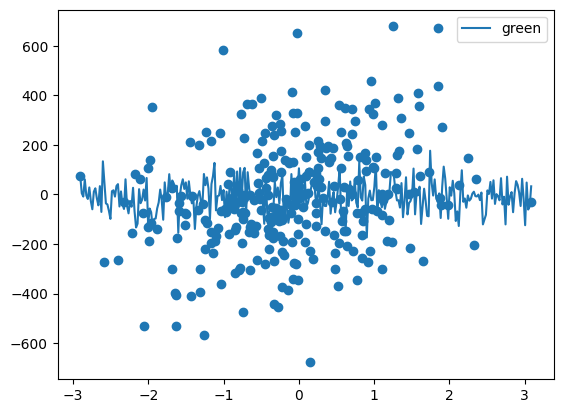

In [146]:
poly_lr = LinearRegression()
poly_lr.fit(X=poly_trns_df.values[:, 0:2], y=poly_trns_df.values[:, 2].reshape(-1, 1))
print(poly_lr.coef_, poly_lr.intercept_)
y_pred = poly_lr.predict(poly_trns_df.values[:, 0:2].reshape(-1,2))
print(poly_train_df.shape, y_pred.shape)

X_new=np.linspace(poly_trns_df.values[:, 0].min(), poly_trns_df.values[:, 0].max(), poly_trns_df.shape[0]).reshape(-1, 1)
# X_new=np.linspace(-3, 3, train_df_trns.shape[0]).reshape(-1, 1)
# X_new=np.linspace(poly_train_df.min(), poly_train_df.max(), 300).reshape(-1, 1)
# X_new=np.arange(-3,2,1).reshape(-1, 1)

plt.tight_layout()
plt.scatter(poly_train_df['feature_1'], poly_train_df['label'])
# plt.plot(train_df['feature_1'], (slope*train_df['feature_1'] + intercept), label='blue' )
# plt.plot(train_df['feature_1'], (lr.coef_[0,0]*train_df['feature_1'] + lr.intercept_[0]), label='red' )
plt.plot(X_new, y_pred, label='green')
plt.legend()
plt.show()